In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [2]:
df=pd.read_csv('Heart Disease data.csv')

## EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Features:
The dataset includes various features related to heart health, such as:

age: Age of the patient 

sex: Sex of the patient (likely binary encoded)(1 for Male and 0 for Female)

cp: Chest pain type (4 values)( 0 : 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic')

trestbps: Resting blood pressure

chol: Serum cholesterol

fbs: Fasting blood sugar(> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic results (values 0,1,2)(0 : 'Normal', 1: 'Abnormal', 2: 'Ventricular hypertrophy')

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment (0 : 'Upsloping', 1: 'Flat', 2: 'Downsloping')

ca: Number of major vessels colored by fluoroscopy (0-4)
0 : 'Mild', 1: 'Moderate', 2: 'Mild Severe',3: 'Moderate Severe', 4: 'Extreme Severe'
thal: Thalassemia (a blood disorder) 0 = normal; 1 = fixed defect; 2 = reversible defect

target: 0 for not heart disease patient and 1 for heart disease patient

In [7]:
df = df.replace({'sex': {0 : 'Female', 1: 'Male'},
                              'cp': {0 : 'Typical angina', 1: 'Atypical angina',
                                     2: 'Non-anginal pain', 3: 'Asymptomatic'},
                              'fbs': {0 : 'No', 1: 'Yes'},
                              'restecg': {0 : 'Normal', 1: 'Abnormal', 2: 'Ventricular hypertrophy'},
                              'exang': {0 : 'No', 1: 'Yes'},
                              'slope': {0 : 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
                              'ca': {0 : 'Mild', 1: 'Moderate', 2: 'Mild Severe',
                                     3: 'Moderate Severe', 4: 'Extreme Severe'},
                              'thal': {0 : 'Normal', 1: 'Fixed defect', 2: 'Reversible defect',
                                       3: 'Extra Defect'},
                              'target': {0 : 'No', 1: 'Yes'}})

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical angina,125,212,No,Abnormal,168,No,1.0,Downsloping,Mild Severe,Extra Defect,No
1,53,Male,Typical angina,140,203,Yes,Normal,155,Yes,3.1,Upsloping,Mild,Extra Defect,No
2,70,Male,Typical angina,145,174,No,Abnormal,125,Yes,2.6,Upsloping,Mild,Extra Defect,No
3,61,Male,Typical angina,148,203,No,Abnormal,161,No,0.0,Downsloping,Moderate,Extra Defect,No
4,62,Female,Typical angina,138,294,Yes,Abnormal,106,No,1.9,Flat,Moderate Severe,Reversible defect,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


The average age of participants is around 54 years.. The median cholesterol level is 240, with blood pressure (trestbps) typically around 130. Most participants have normal blood sugar levels (fbs mean 0.15) and normal resting electrocardiographic results (restecg mean 0.53). The thalach (maximum heart rate) averages around 149. The target variable shows a roughly equal distribution between those with and without heart disease, with a mean near 0.51.

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null value in dataset.

In [11]:
countsofTarget=df['target'].value_counts(normalize=True)*100
countsofTarget

Yes    51.317073
No     48.682927
Name: target, dtype: float64

Almost 51 % of people have Heart Diesease

Text(0.5, 1.0, 'Number of Target Values')

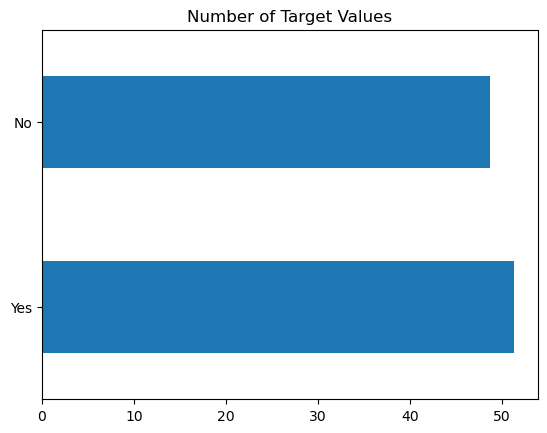

In [12]:
countsofTarget.plot.barh()
plt.title('Number of Target Values')

There is very slight difference in the range of heart disease patient and without heart disease patient.(1-Yes, 0- No)

# Univariate Analysis (Independent Variables)

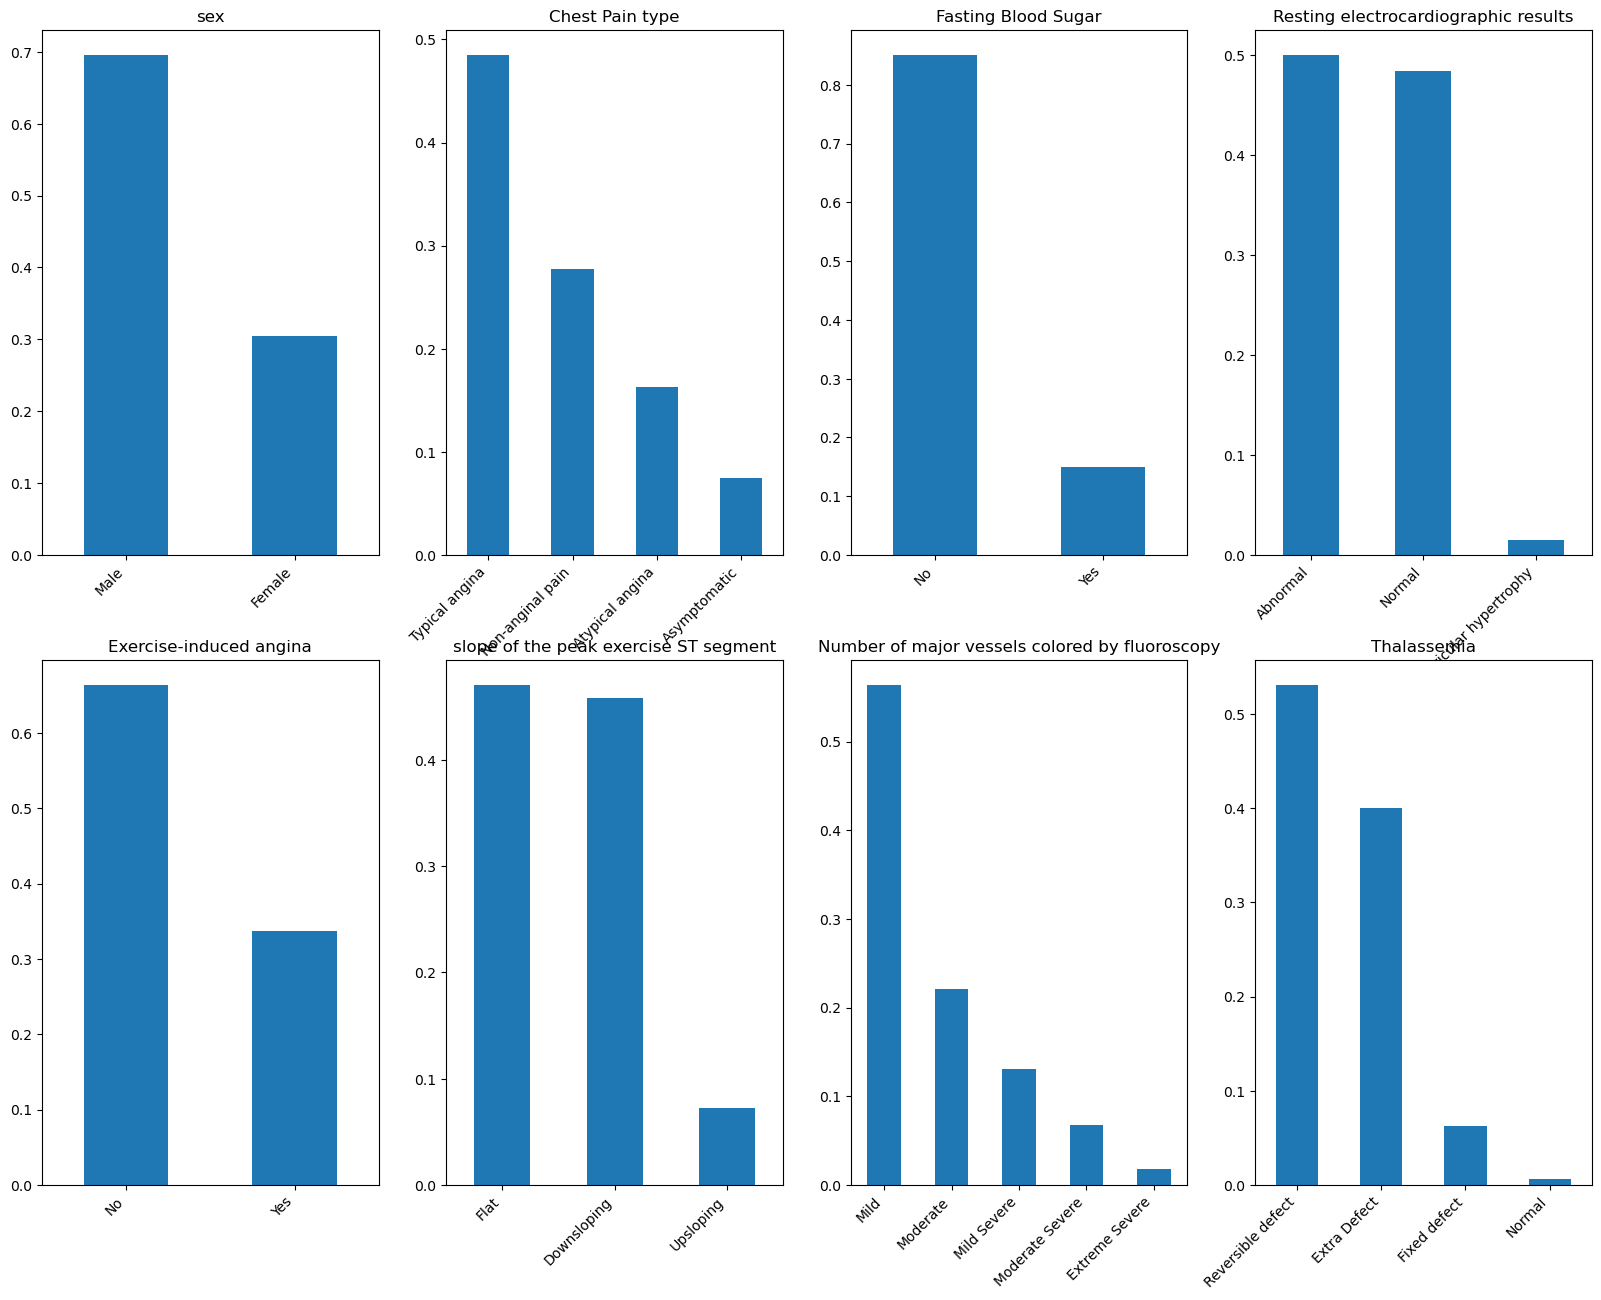

In [13]:
plt.subplot(241)
df['sex'].value_counts(normalize=True).plot.bar(figsize=(20,15), title= 'sex')
plt.xticks(rotation=45,ha='right')
plt.subplot(242)
df['cp'].value_counts(normalize=True).plot.bar(title= 'Chest Pain type')
plt.xticks(rotation=45,ha='right')
plt.subplot(243)
df['fbs'].value_counts(normalize=True).plot.bar(title= 'Fasting Blood Sugar')
plt.xticks(rotation=45,ha='right')
plt.subplot(244)
df['restecg'].value_counts(normalize=True).plot.bar(title= 'Resting electrocardiographic results')
plt.xticks(rotation=45,ha='right')
plt.subplot(245)
df['exang'].value_counts(normalize=True).plot.bar(title= 'Exercise-induced angina')
plt.xticks(rotation=45,ha='right')
plt.subplot(246)
df['slope'].value_counts(normalize=True).plot.bar(title= 'slope of the peak exercise ST segment')
plt.xticks(rotation=45,ha='right')
plt.subplot(247)
df['ca'].value_counts(normalize=True).plot.bar(title= 'Number of major vessels colored by fluoroscopy')
plt.xticks(rotation=45,ha='right')
plt.subplot(248)
df['thal'].value_counts(normalize=True).plot.bar(title= 'Thalassemia')
plt.xticks(rotation=45,ha='right')
plt.show()

It can be inferred from above bar plot that:
- 70% in the  dataset are Male.
- 50% in the dataset is Typical angina chest pain.
- 85% in the dataset have no fasting blood sugar.
- almost same value is for normal and abnormal resting electrocardiographic results.
- 65% in the dataset are not Exercise induced angina.
- downsloping and flat slope of the peak excercise ST segment are slightly difference.
- 60% in the dataset have Mild number of major vessels colored by fluoroscopy.
- Reversible defect Thalassemia have 55% of the dataset.




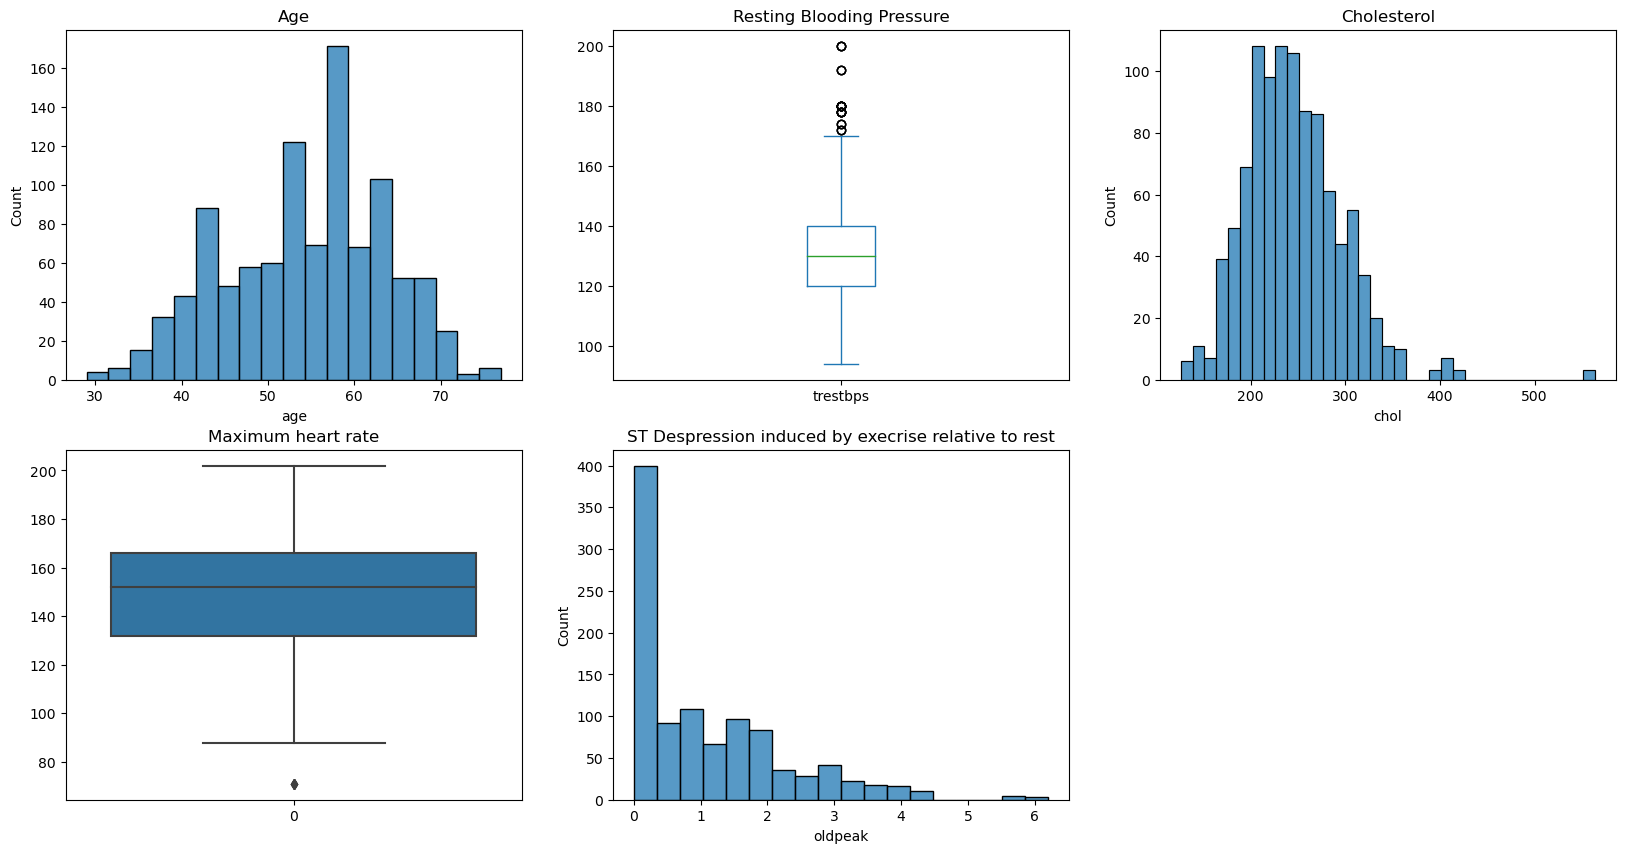

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(231)

sns.histplot(df['age'])
plt.title("Age")

plt.subplot(232)
#sns.distplot(df['trestbps'])
df['trestbps'].plot.box()
plt.title('Resting Blooding Pressure')

plt.subplot(233)
sns.histplot(df['chol'])
plt.title('Cholesterol')

plt.subplot(234)
sns.boxplot(df['thalach'])
plt.title('Maximum heart rate')

plt.subplot(235)
sns.histplot(df['oldpeak'])
plt.title('ST Despression induced by execrise relative to rest')

plt.show()

- The age distribution is relatively normal, with most individuals between 50 and 60 years old. 
- resting blood pressure is around 130, with some outliers extending beyond 180.
- cholesterol levels are skewed to the right, with cholesterol between 200 and 300. A small number of individuals have very high cholesterol levels, exceeding 400.
- the median maximum heart rate is around 150, with most values ranging between 120 and 180.
- right-skewed distribution, with most participants having low ST depression values (0 to 2).

# Bivariate Analysis (Independent Variable vs Target variable)

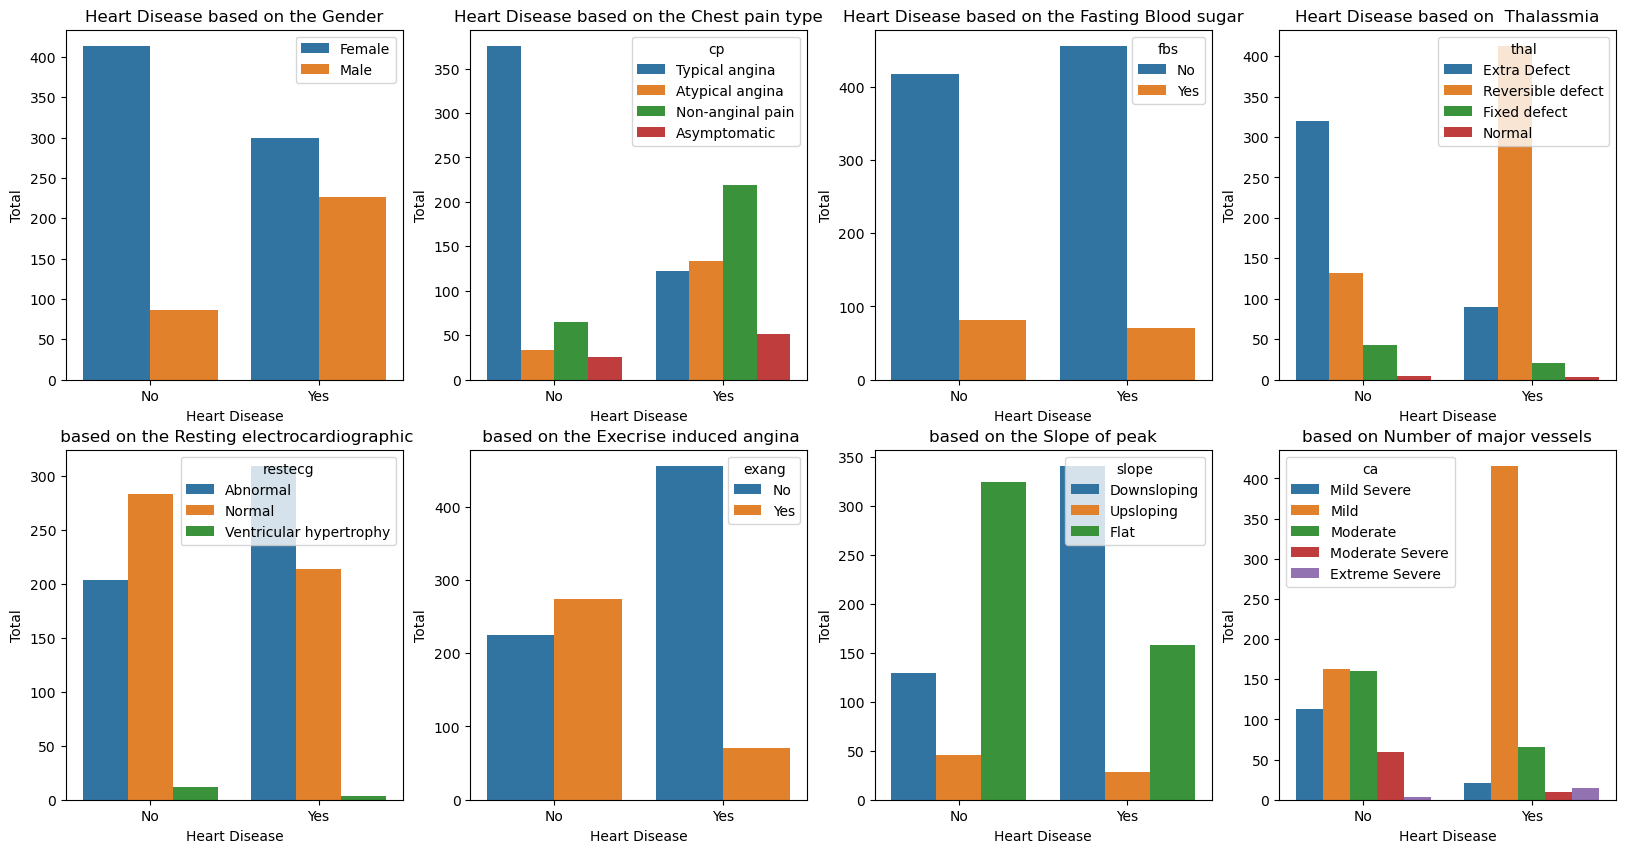

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.countplot(x=df['target'],hue='sex',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
plt.legend(labels=['Female','Male'])
plt.title('Heart Disease based on the Gender')


plt.subplot(242)
sns.countplot(x=df['target'],hue='cp',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title('Heart Disease based on the Chest pain type')

plt.subplot(243)
sns.countplot(x=df['target'],hue='fbs',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title('Heart Disease based on the Fasting Blood sugar')

plt.subplot(244)
sns.countplot(x=df['target'],hue='thal',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title('Heart Disease based on  Thalassmia')

plt.subplot(245)
sns.countplot(x=df['target'],hue='restecg',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title(' based on the Resting electrocardiographic')

plt.subplot(246)
sns.countplot(x=df['target'],hue='exang',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title(' based on the Execrise induced angina')


plt.subplot(247)
sns.countplot(x=df['target'],hue='slope',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title('based on the Slope of peak')

plt.subplot(248)
sns.countplot(x=df['target'],hue='ca',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total')
#plt.legend(labels=['Female','Male'])
plt.title('based on Number of major vessels')
plt.show()

- Males are more represented and have a higher prevalence of heart disease than Females.
- People with typical angina (cp=0) are less likely to have heart disease, while those with asymptomatic chest pain (cp=3) are more likely to have it.
- Individuals with a thalassemia value of 2 or 3 are more likely to have heart disease compared to those with a thalassemia value of 0 or 1.
- People with normal resting ECG results (restecg=0) are less likely to have heart disease, while those with ST-T wave abnormality (restecg=1) are more likely to have it.
- People without exercise-induced angina (exang=0) are more likely to have heart disease compared to those with it (exang=1).
- Individuals with a flat slope (slope=2) are more likely to have heart disease, while those with an upsloping segment (slope=0) are less likely to have it.
- Most people with heart disease have 0 or 1 major vessel affected.

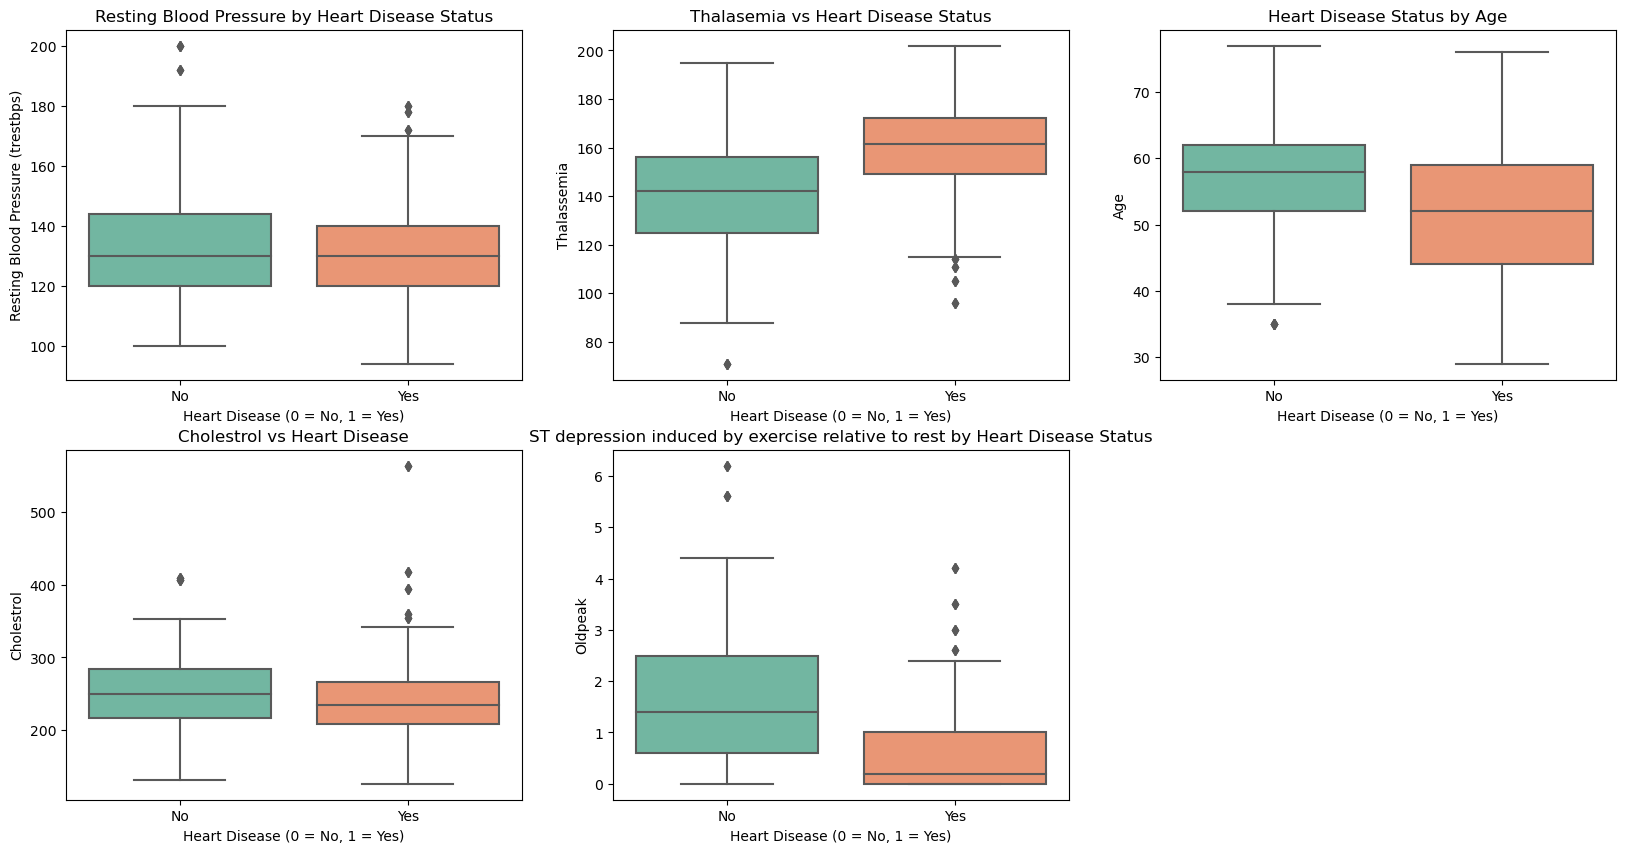

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.boxplot(x='target', y='trestbps', data=df, palette='Set2')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (trestbps)')

plt.subplot(232)
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Thalasemia vs Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Thalassemia')


plt.subplot(233)
sns.boxplot(x='target', y='age', data=df, palette='Set2')
plt.title('Heart Disease Status by Age')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.subplot(234)
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholestrol vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholestrol')

plt.subplot(235)
sns.boxplot(x='target', y='oldpeak', data=df, palette='Set2')
plt.title('ST depression induced by exercise relative to rest by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Oldpeak')

plt.show()

- Resting Blood Pressure (trestbps) and Cholesterol : Doesn't show a clear differentiation between those with and without heart disease, though there are outliers in both groups.
- Age: Older individuals are slightly more likely to have heart disease, but age alone isn't a definitive predictor.
- Thalassemia and ST Depression (Oldpeak) seem to be stronger indicators of heart disease risk, showing more distinct differences between the groups compared to other features.

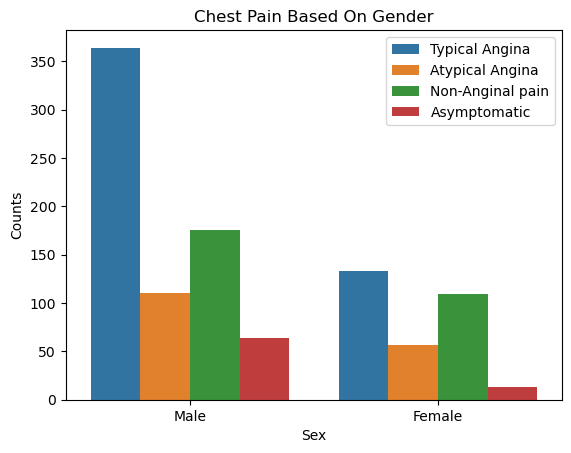

In [17]:

sns.countplot(x=df['sex'], hue='cp', data=df)
plt.title('Chest Pain Based On Gender')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

The chart indicates that males are more prone to all types of chest pain, especially typical angina. This aligns with the general observation that males in the dataset have a higher prevalence of heart disease-related symptoms compared to females.

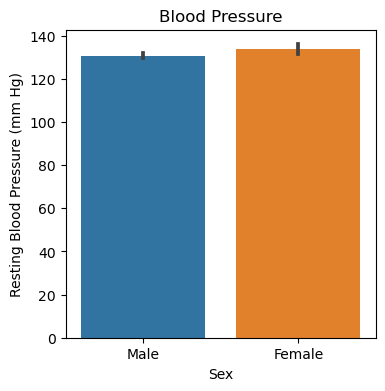

In [34]:

plt.figure(figsize=(4,4))
sns.barplot(x='sex', y='trestbps', data=df)
plt.title("Blood Pressure")
plt.xlabel('Sex')
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.show()

There is very slight difference in the Resting Blood pressure of Male and Females.Female Resting Blood Pressure is slightly high than Male.



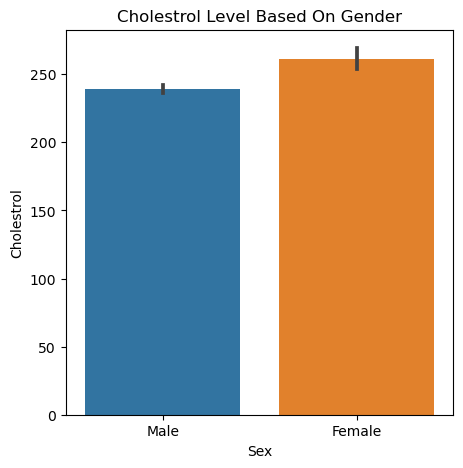

In [19]:

plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='chol', data=df)
plt.title("Cholestrol Level Based On Gender")
plt.xlabel('Sex')
plt.ylabel("Cholestrol")
plt.show()

Cholestrol level of Female is inche of high than Males.

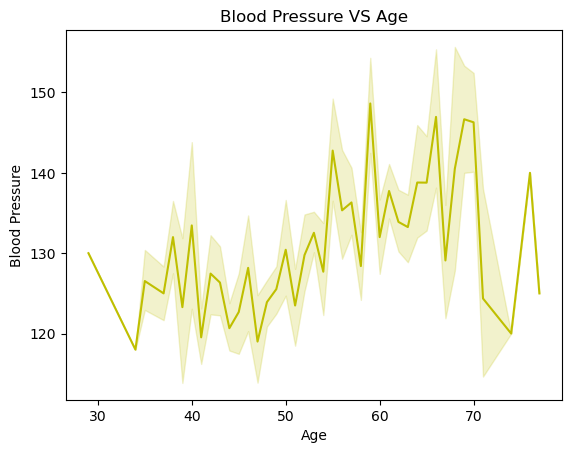

In [48]:

sns.lineplot(x='age', y='trestbps', data=df, color='y')
plt.title('Blood Pressure VS Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

Blood Pressure increases from age 50 to 70.

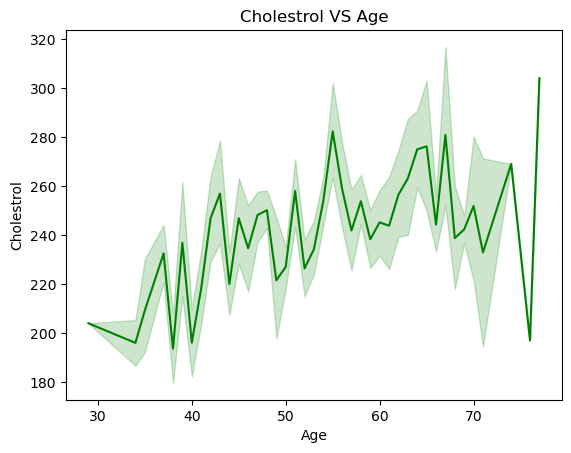

In [21]:

sns.lineplot(x='age', y='chol', data=df, color='g')
plt.title('Cholestrol VS Age')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

Cholestrol level Increases from age of 40 to 70.

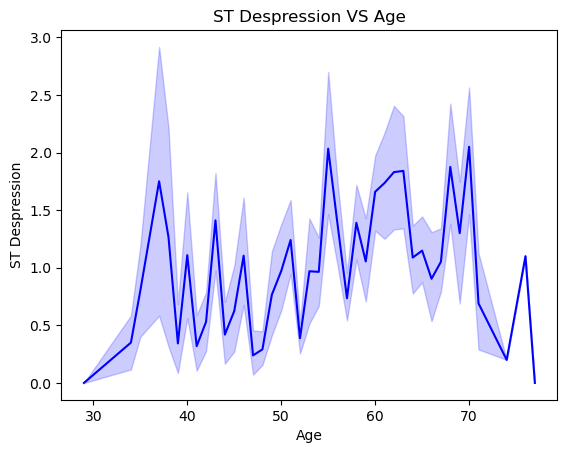

In [22]:

sns.lineplot(x='age', y='oldpeak', data=df, color='b')
plt.title('ST Despression VS Age')
plt.xlabel('Age')
plt.ylabel('ST Despression')
plt.show()

The line chart "ST Depression vs Age" shows that ST depression levels fluctuate widely across different ages, with noticeable peaks around the ages of 40, 50, and 60.

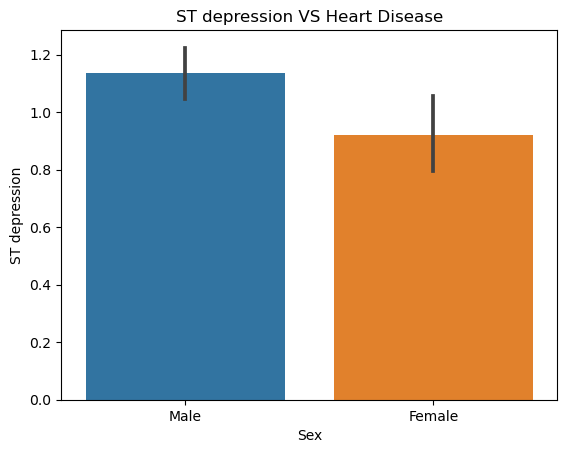

In [40]:
sns.barplot(x='sex', y='oldpeak', data=df)
plt.title('ST depression VS Heart Disease')
plt.xlabel('Sex')
plt.ylabel('ST depression')
plt.show()

Males are prone to ST depression as compare to females

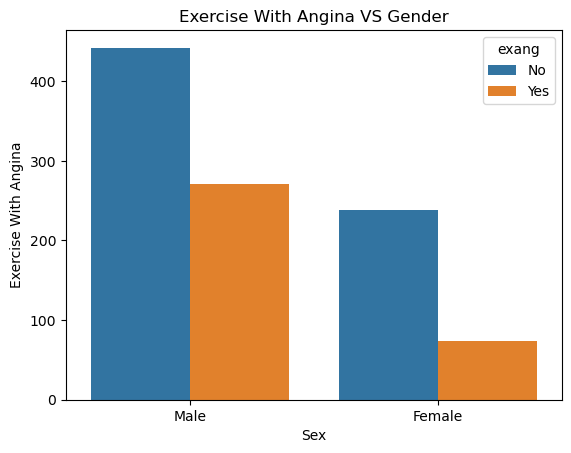

In [47]:
sns.countplot(x=df['sex'], hue='exang', data=df)
plt.title('Exercise With Angina VS Gender')
plt.xlabel('Sex')
plt.ylabel('Exercise With Angina')
plt.show()

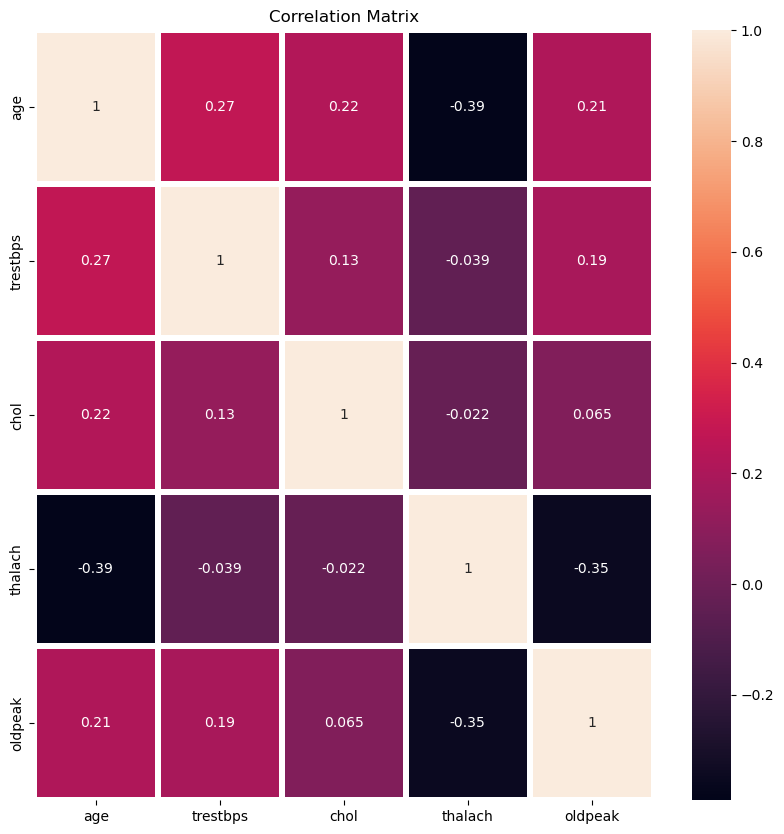

In [23]:
plt.figure(figsize=(10,10))
corr_df=df.corr()
sns.heatmap(corr_df,annot=True,linewidths=3)
plt.title('Correlation Matrix')
plt.show()

- Chest pain type (cp), maximum heart rate (thalach), ST depression (oldpeak), exercise-induced angina (exang), and number of major vessels (ca) are some of the most relevant features associated with heart disease.
- Features like cholesterol, resting blood pressure, and fasting blood sugar have weaker correlations with heart disease, implying they may be less significant in predictive models.

In [24]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [25]:
df1=pd.read_csv('Heart Disease data.csv')

X = df1.drop('target', axis=1)  # Features
y = df1['target']  # Target variable


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [29]:
y_pred = model.predict(X_test)


Confusion Matrix:
 [[119  40]
 [ 20 129]]


<Axes: >

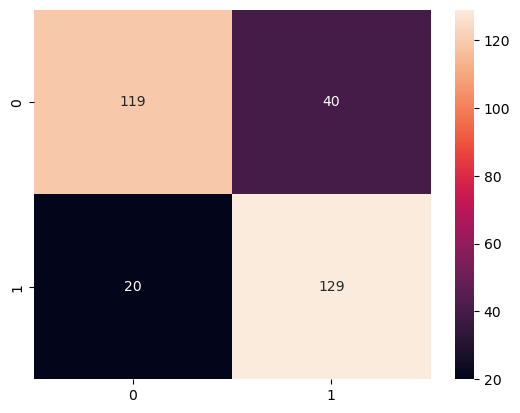

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt="d")


In [31]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))


Accuracy Score: 80.52%


Feature: age, Score: 0.00009
Feature: sex, Score: -0.87347
Feature: cp, Score: 0.89169
Feature: trestbps, Score: -0.27947
Feature: chol, Score: -0.56694
Feature: fbs, Score: -0.08137
Feature: restecg, Score: 0.12063
Feature: thalach, Score: 0.60983
Feature: exang, Score: -0.36907
Feature: oldpeak, Score: -0.77155
Feature: slope, Score: 0.36544
Feature: ca, Score: -0.79155
Feature: thal, Score: -0.61269


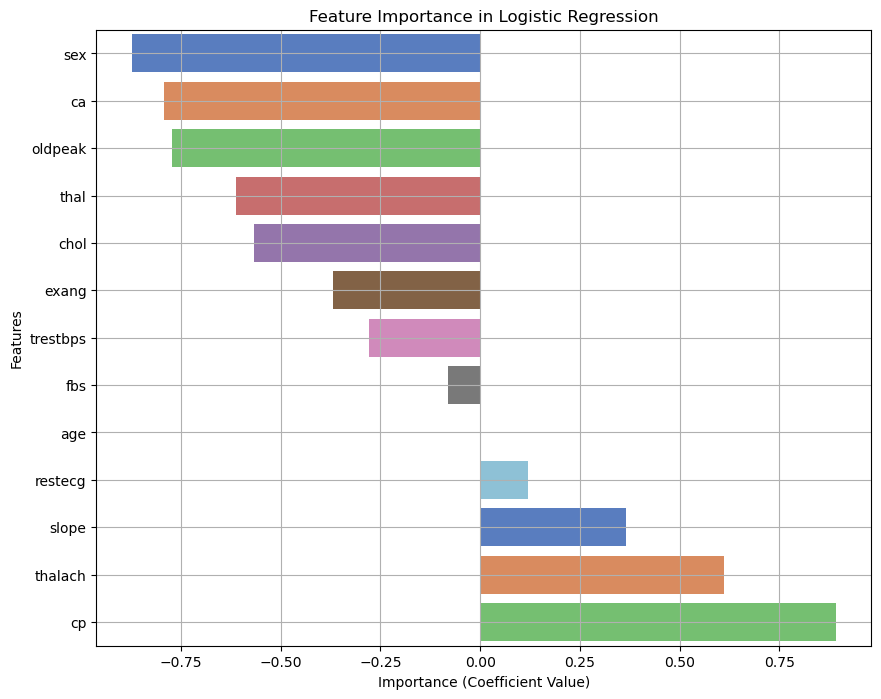

In [33]:
importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v:.5f}")


feature=X.columns
sorted_indices = importance.argsort()
plt.figure(figsize=(10, 8))
sns.barplot(y=feature[sorted_indices], x=importance[sorted_indices],palette='muted')
plt.xlabel('Importance (Coefficient Value)')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.grid(True)
plt.show()

Features such as cp (chest pain type), thalach (maximum heart rate), exang (exercise-induced angina), and oldpeak (ST depression) have the highest coefficients, indicating their strong influence on the prediction of heart disease.